In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# load data

df = pd.read_csv('../data/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# Simple EDA
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
df.shape

(297, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [34]:
df['condition'].value_counts()
# почти сбалансированная выборка, в целом можно использовать так в первом приближении

0    160
1    137
Name: condition, dtype: int64

In [9]:
# everything is  good

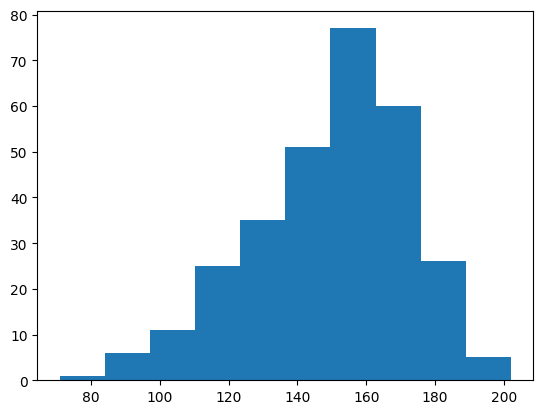

In [10]:
# check normality
plt.hist(df['thalach'])
plt.show()

## Let's apply some models

In [11]:
X = df.drop(columns=['condition'])
Y = df['condition']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print("Accuracy:", round(np.sum(y_pred == y_test) / len(y_pred), 3))

Accuracy: 0.733


In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import sys
sys.path.append("..")

In [18]:
from src.transformers import CustomScaler
from src.data import split_train_val_data, read_data

In [19]:
data = read_data('../data/heart_cleveland_upload.csv')

In [20]:
train_data, val_data = train_test_split(data)

In [21]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
264,50,1,3,144,200,0,2,126,1,0.9,1,0,2,1
263,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1
50,49,0,1,134,271,0,0,162,0,0.0,1,0,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2,0
183,63,1,3,130,330,1,2,132,1,1.8,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,45,1,1,128,308,0,2,170,0,0.0,0,0,0,0
73,71,0,2,110,265,1,2,130,0,0.0,0,1,0,0
113,54,0,2,160,201,0,0,163,0,0.0,0,1,0,0
204,60,1,3,130,253,0,0,144,1,1.4,0,1,2,1


In [23]:
# let's test our custom scaler

In [24]:
from src.transformers import CustomScaler

In [25]:
col_train = train_data['chol']
col_val = val_data['chol']

In [26]:
sc = CustomScaler()

In [27]:
# sc.fit(col_train)
sc.fit(train_data)

CustomScaler()

In [28]:
q = sc.transform(val_data)

In [29]:
q

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
110,-0.015696,-1.414214,-0.185017,0.198615,1.082933,2.436699,-1.009133,0.885135,-0.707107,-0.915021,-0.971928,-0.714286,-0.845714,-0.905357
96,0.546325,0.707107,-0.185017,-0.300546,-0.533971,2.436699,-1.009133,-0.750472,-0.707107,0.953274,0.626353,0.342857,0.197333,1.104536
118,-0.352908,0.707107,-0.185017,-1.742566,-0.458766,-0.410391,-1.009133,-0.341570,1.414214,0.104049,0.626353,-0.714286,-0.845714,-0.905357
164,1.445558,0.707107,0.868157,-0.633320,-0.176748,-0.410391,-1.009133,-3.612784,-0.707107,-0.065796,0.626353,-0.714286,-0.845714,1.104536
271,-0.802525,0.707107,0.868157,-1.077018,-0.797188,-0.410391,-1.009133,-0.341570,-0.707107,-0.830098,-0.971928,-0.714286,-0.845714,-0.905357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.209112,0.707107,0.868157,-0.078697,0.688107,2.436699,1.009133,-2.158911,1.414214,0.443739,2.224634,-0.714286,1.240380,1.104536
173,1.220749,0.707107,0.868157,-1.187943,0.030065,-0.410391,1.009133,0.339933,-0.707107,-0.405486,-0.971928,1.400000,0.197333,1.104536
210,0.546325,0.707107,0.868157,1.807022,-1.323622,2.436699,1.009133,-2.749547,-0.707107,-0.065796,0.626353,1.400000,0.197333,1.104536
22,-2.263779,0.707107,-2.291365,-0.744244,-1.210815,-0.410391,1.009133,1.066869,-0.707107,-0.915021,-0.971928,-0.714286,-0.845714,-0.905357


In [30]:
# plt.hist(q)
# plt.show()

In [31]:
col_train

264    200
263    243
50     271
286    211
183    330
      ... 
58     308
73     265
113    201
204    253
185    268
Name: chol, Length: 222, dtype: int64

In [32]:
true_sc = StandardScaler()
q1 = true_sc.fit(train_data).transform(val_data)

In [33]:
q1

array([[-0.01569607, -1.41421356, -0.18501707, ..., -0.71428571,
        -0.84571377, -0.90535746],
       [ 0.54632463,  0.70710678, -0.18501707, ...,  0.34285714,
         0.19733321,  1.1045361 ],
       [-0.3529085 ,  0.70710678, -0.18501707, ..., -0.71428571,
        -0.84571377, -0.90535746],
       ...,
       [ 0.54632463,  0.70710678,  0.868157  , ...,  1.4       ,
         0.19733321,  1.1045361 ],
       [-2.2637789 ,  0.70710678, -2.2913652 , ..., -0.71428571,
        -0.84571377, -0.90535746],
       [-0.01569607,  0.70710678, -0.18501707, ..., -0.71428571,
         1.2403802 , -0.90535746]])

In [42]:
# Look's the same